# Replaying the Interaction Dataset

This notebook shows how to use the interaction dataset in bark. 

For details on the dataset visit http://interaction-dataset.com/ or read there paper https://arxiv.org/abs/1910.03088

For viewing the data we highly recommend the provided tools: https://github.com/interaction-dataset/interaction-dataset

In [5]:
%matplotlib tk

from bark.runtime.scenario.scenario_generation.interaction_dataset_scenario_generation import \
    InteractionDatasetScenarioGeneration
from bark.runtime.commons.parameters import ParameterServer
from bark.runtime.viewer.matplotlib_viewer import MPViewer
from bark.runtime.viewer.video_renderer import VideoRenderer
import os
import os.path
import argparse
import matplotlib.pyplot as plt

Make sure you have access to the dataset. For licencing reasons, it is not enclosed with bark!

We recommend to place the data into a seperate git repository. In this case, in the top level WORKSPACE file, change the following lines accordingly:


```
git_repository(
 name = "interaction_dataset_fortiss_internal",
 commit = "4152cdddcb04efa9a54524f9d737d1e89b1eafad",
 remote = "https://git.fortiss.org/autosim/interaction_dataset"
)
```



Then, start the notebook server with `bazel run docs/tutorials:run --define interaction_dataset_present=true`

Here, we specify which slize of the dataset shall be loaded. **Note that the files have to exist!** The dataset itself is not included in bark! We here specify the parameters:
- The map: "MapFilename"
- The vehicle trajectories: "TrackFilename"
- Which vehicles: "TrackIds"
- Start time: "StartTs"
- End Time: "EndTs"
- Who's treated as ego agent (aka. where are metrics evaluated): "EgoTrackId"


## Let's Do a Scenario Replay

We take out one slice of the dataset as starting and in the rist step just do a dump replay. For this we create a parameter server specifying which slice in time we want to simulate and which agents:

In [6]:
# Setup parameter server
param_server = ParameterServer()
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["MapFilename"] = os.path.expanduser('~') +"/bark/interaction_dataset/DR_DEU_Merging_MT/map/DR_DEU_Merging_MT_v01_shifted.xodr"
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["TrackFilename"] = os.path.expanduser('~') +"/bark/interaction_dataset/DR_DEU_Merging_MT/tracks/vehicle_tracks_013.csv"
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["TrackIds"] = [63,64,65,66,67,68]
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["StartTs"] = 232000
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["EndTs"] = 259000
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["EgoTrackId"] = 65
param_server["simulation"]["step_time"] = 0.1 # has to match the prerecorded traces! 

The class InteractionDatasetScenarioGeneration wraps all functionalities to generate a runnable scenario from the dataset, you just have to...

In [7]:
#...create the scenario
scenario_generation = InteractionDatasetScenarioGeneration(num_scenarios=1, random_seed=0, params=param_server)
scenario = scenario_generation.create_scenarios(param_server, 1)[0]

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/commons/xodr_parser.py:108: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if lane.find("userData"):


In [8]:
# Define how long the scenario shall run:
param_server["simulation"]["sim_time_steps"] = 30

# Init viewer
param_server["Visualization"]["Agents"]["DrawEvalGoals"] = False
viewer = MPViewer(params=param_server, use_world_bounds=True)

# Run the scenario
world_state = scenario.GetWorldState()
for _ in range(0, param_server["simulation"]["sim_time_steps"]):
    world_state.Step(param_server["simulation"]["step_time"])
    viewer.drawWorld(world_state, scenario._eval_agent_ids)
    viewer.show()

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

## Replacing an Agent

Based on the above, we replace one agent with another agent model. For this, we just add a parameter to the server. Here we chose the replate the agent 67 with an IDM with standard parameters.

In [5]:
# Insert the IDM Agent
param_server_idm = param_server
param_server_idm["Scenario"]["Generation"]["InteractionDataset"]["BehaviorModel"] = {"67":"BehaviorIDMClassic"}

Now, create one new scenario as above:

In [6]:
scenario_generation_idm = InteractionDatasetScenarioGeneration(num_scenarios=1, random_seed=0, params=param_server_idm)
scenario_idm = scenario_generation_idm.create_scenarios(param_server, 1)[0]

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/commons/xodr_parser.py:108: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if lane.find("userData"):


/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

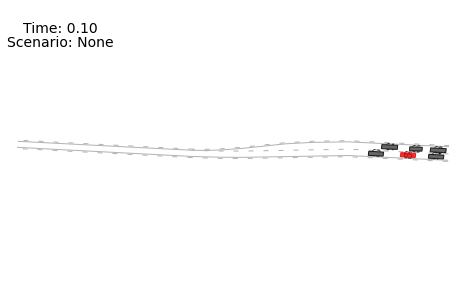

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  linewidth=linewidth)
/home/kessler/.cache/bazel/_bazel_kessler/6ba317d7828f21aa2067abd006e869d3/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/bark/runtime/viewer/matplotlib_viewer.py:49: MatplotlibDeprecationWarning: Case-insensitive propertie

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
# Define how long the scenario shall run:
param_server_idm["simulation"]["sim_time_steps"] = 30

# Init viewer
viewer = MPViewer(params=param_server_idm, use_world_bounds=True)

# Run the scenario
world_state = scenario_idm.GetWorldState()
for _ in range(0, param_server_idm["simulation"]["sim_time_steps"]):
    world_state.Step(param_server_idm["simulation"]["step_time"])
    viewer.drawWorld(world_state, scenario_idm._eval_agent_ids)
    viewer.show(block=False)


That's it. We now have replayed one slice of the interaction dataset in bark and inserted an IDM agent, that is abel to follow the given traffic.